In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt_FULLDATA_NORMALNOISE import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDimsNormalNoise/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                print(mses_full)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

          bw          mse
18  0.041919  2560.024669
         bw          mse
1  0.000372  4079.216884
           bw      mse
46  50.118723  7.84664
          bw         mse
23  0.168214  365.762091
          bw          mse
16  0.024046  3271.921951
         bw          mse
21  0.09649  1129.559555
          bw          mse
12  0.007912  3925.746728
         bw          mse
3  0.000649  4078.585599
          bw       mse
38  7.852356  7.757449
            bw       mse
52  398.107171  7.848621
         bw       mse
59  10000.0  7.848652
          bw          mse
10  0.004538  4024.759371
           bw       mse
41  15.848932  7.827958
         bw          mse
9  0.003437  4048.074465
         bw          mse
2  0.000491  4078.957856
         bw       mse
37  6.16595  7.693539
          bw         mse
24  0.222102  153.494708
          bw          mse
11  0.005992  3986.044178
         bw          mse
5  0.001131  4075.409663
          bw      mse
36  4.841724  7.58397
           bw     

Text(0.5, 1.0, 'Minimum MSE is (6.72679947267462, 32)')

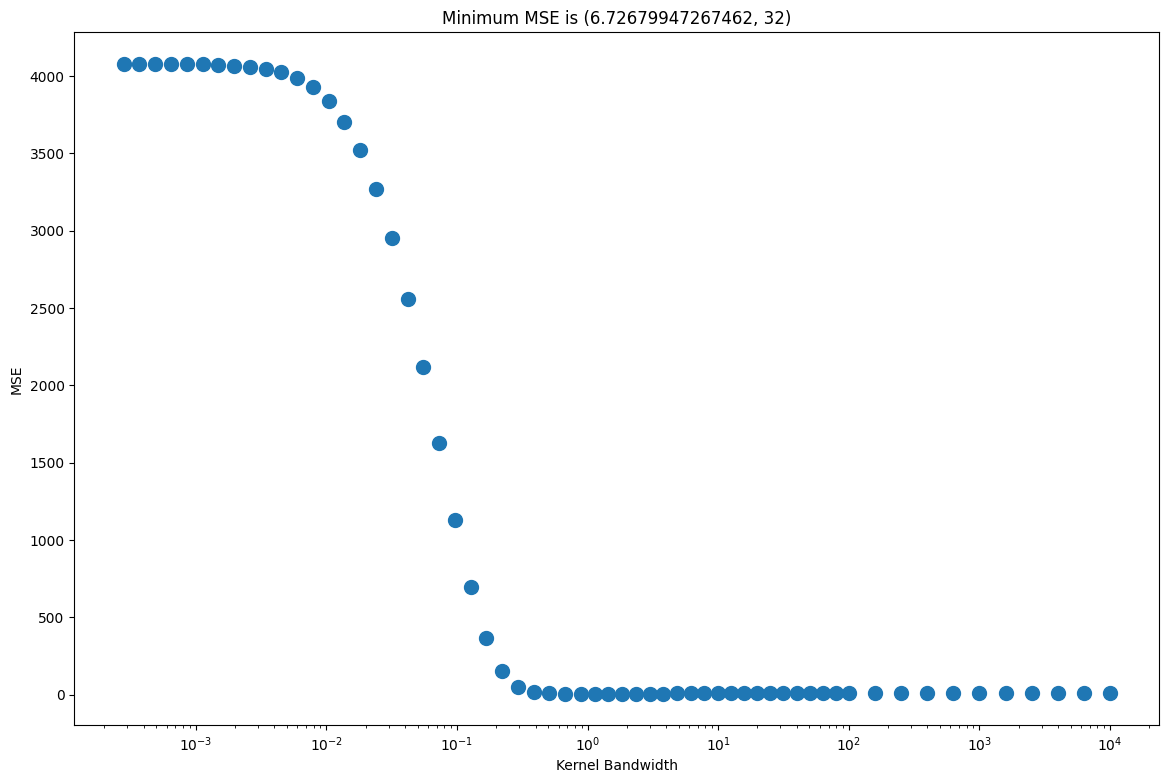

In [4]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")

In [5]:
print(mses)

              bw          mse
0       0.000282  4079.715936
1       0.000372  4079.216884
2       0.000491  4078.957856
3       0.000649  4078.585599
4       0.000857  4077.643177
5       0.001131  4075.409663
6       0.001493  4072.046316
7       0.001972  4067.501650
8       0.002603  4060.660319
9       0.003437  4048.074465
10      0.004538  4024.759371
11      0.005992  3986.044178
12      0.007912  3925.746728
13      0.010446  3835.788385
14      0.013793  3704.427240
15      0.018211  3520.179623
16      0.024046  3271.921951
17      0.031749  2949.607940
18      0.041919  2560.024669
19      0.055348  2116.931965
20      0.073079  1627.644333
21      0.096490  1129.559555
22      0.127401   693.662134
23      0.168214   365.762091
24      0.222102   153.494708
25      0.293252    47.149138
26      0.387196    14.318363
27      0.511235     7.974565
28      0.675010     7.340028
29      0.891251     7.098234
30      1.135011     6.902400
31      1.445440     6.751765
32      1.